In [128]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime as dt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [129]:
df = pd.read_csv('london_merged_v2.csv')


In [130]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,15-01-04,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,15-01-04,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,15-01-04,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,15-01-04,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,15-01-04,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,17409,2017-01-03 19:00:00,17-01-03,2017,Jan,3,Tuesday,1,19:00,1042,5.0,1.0,81.0,19.0,Broken clouds,3,0.0,0.0,3.0
17410,17410,2017-01-03 20:00:00,17-01-03,2017,Jan,3,Tuesday,1,20:00,541,5.0,1.0,81.0,21.0,Cloudy,4,0.0,0.0,3.0
17411,17411,2017-01-03 21:00:00,17-01-03,2017,Jan,3,Tuesday,1,21:00,337,5.5,1.5,78.5,24.0,Cloudy,4,0.0,0.0,3.0
17412,17412,2017-01-03 22:00:00,17-01-03,2017,Jan,3,Tuesday,1,22:00,224,5.5,1.5,76.0,23.0,Cloudy,4,0.0,0.0,3.0


In [73]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,15-01-04,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,15-01-04,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,15-01-04,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,15-01-04,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,15-01-04,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,17409,2017-01-03 19:00:00,17-01-03,2017,Jan,3,Tuesday,1,19:00,1042,5.0,1.0,81.0,19.0,Broken clouds,3,0.0,0.0,3.0
17410,17410,2017-01-03 20:00:00,17-01-03,2017,Jan,3,Tuesday,1,20:00,541,5.0,1.0,81.0,21.0,Cloudy,4,0.0,0.0,3.0
17411,17411,2017-01-03 21:00:00,17-01-03,2017,Jan,3,Tuesday,1,21:00,337,5.5,1.5,78.5,24.0,Cloudy,4,0.0,0.0,3.0
17412,17412,2017-01-03 22:00:00,17-01-03,2017,Jan,3,Tuesday,1,22:00,224,5.5,1.5,76.0,23.0,Cloudy,4,0.0,0.0,3.0


### Correlation

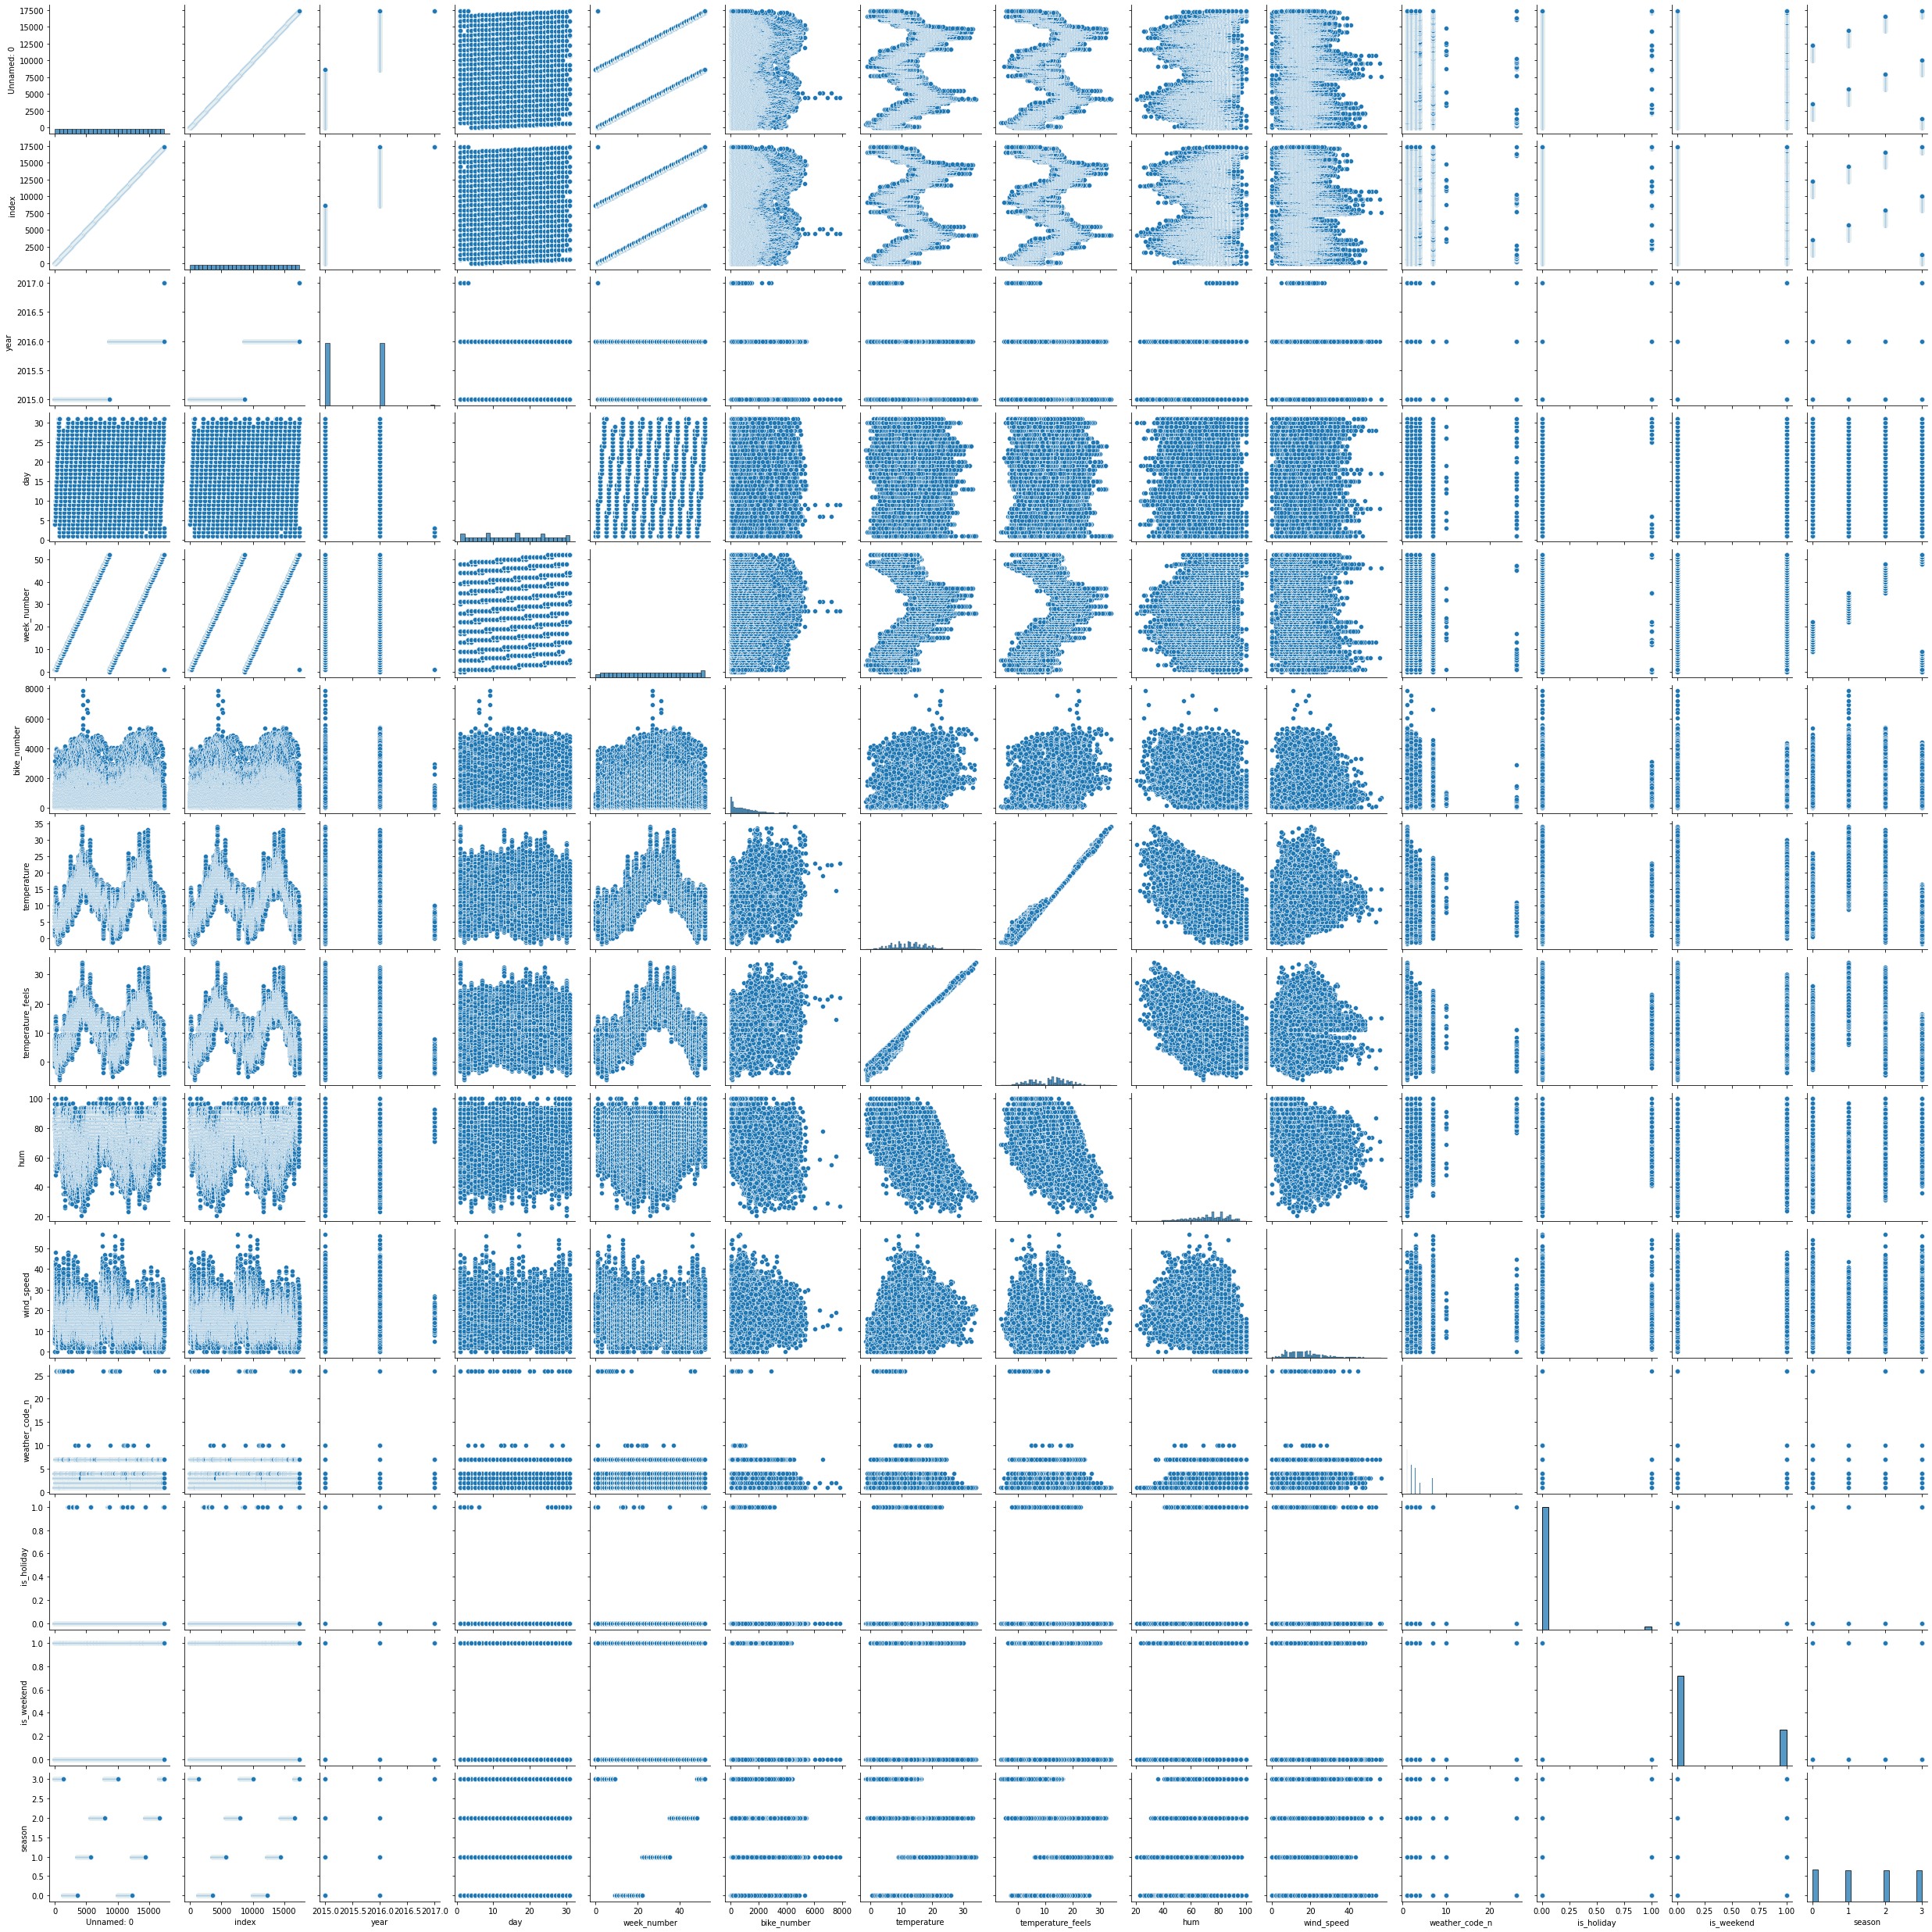

In [64]:
sns.pairplot(df)

<AxesSubplot:>

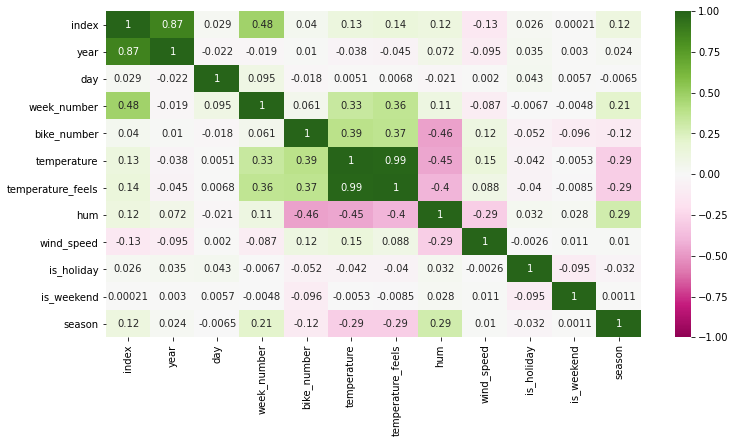

In [24]:
fig = plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap='PiYG', vmin=-1, annot=True)

In [75]:
fig=plt.figure(figsize=(12,6))
x = df.groupby('day_name').bike_number.agg('mean')

<Figure size 864x432 with 0 Axes>

In [91]:
ordered=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

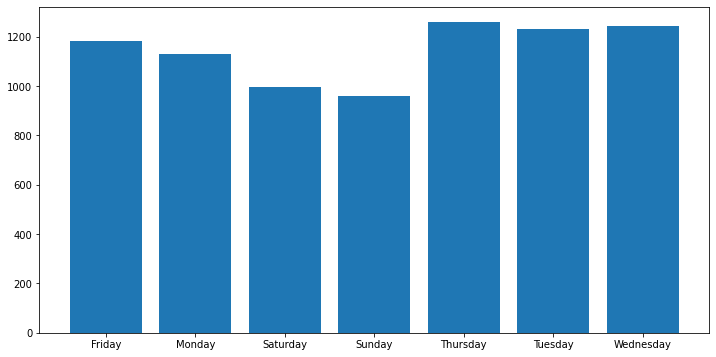

In [101]:
fig=plt.figure(figsize=(12,6))
week_plot = plt.bar(x.index, x.values)
locs, labels = xticks()
xtickst=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [102]:
z = df.groupby('date').bike_number.agg('mean')

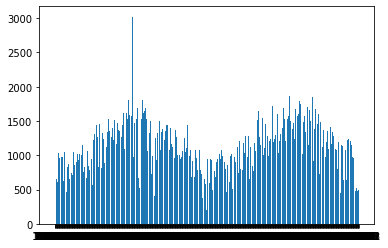

In [104]:
week_plot = plt.bar(z.index, z.values)

In [132]:
df['timestamp']

0        2015-01-04 00:00:00
1        2015-01-04 01:00:00
2        2015-01-04 02:00:00
3        2015-01-04 03:00:00
4        2015-01-04 04:00:00
                ...         
17409    2017-01-03 19:00:00
17410    2017-01-03 20:00:00
17411    2017-01-03 21:00:00
17412    2017-01-03 22:00:00
17413    2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: object

In [139]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [140]:
df['date'] = df.timestamp.apply(lambda x : x.strftime('%d-%m-20%y'))

In [143]:
df.to_csv('london_merged_v3.csv', index=False)

In [144]:
df = pd.read_csv('london_merged_v3.csv')


In [145]:
df

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,04-01-2015,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,04-01-2015,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,04-01-2015,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,04-01-2015,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,04-01-2015,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,17409,2017-01-03 19:00:00,03-01-2017,2017,Jan,3,Tuesday,1,19:00,1042,5.0,1.0,81.0,19.0,Broken clouds,3,0.0,0.0,3.0
17410,17410,2017-01-03 20:00:00,03-01-2017,2017,Jan,3,Tuesday,1,20:00,541,5.0,1.0,81.0,21.0,Cloudy,4,0.0,0.0,3.0
17411,17411,2017-01-03 21:00:00,03-01-2017,2017,Jan,3,Tuesday,1,21:00,337,5.5,1.5,78.5,24.0,Cloudy,4,0.0,0.0,3.0
17412,17412,2017-01-03 22:00:00,03-01-2017,2017,Jan,3,Tuesday,1,22:00,224,5.5,1.5,76.0,23.0,Cloudy,4,0.0,0.0,3.0


In [121]:
df['date']=df.date.apply(lambda x : x.strftime('%d-%m-%Y'))

,index,timestamp,date,year,month,day,day_name,week_number,time,bike_number,temperature,temperature_feels,hum,wind_speed,weather_code,weather_code_n,is_holiday,is_weekend,season
0,0,2015-01-04 00:00:00,15-01-2004,2015,Jan,4,Sunday,1,00:00,182,3.0,2.0,93.0,6.0,Broken clouds,3,0.0,1.0,3.0
1,1,2015-01-04 01:00:00,15-01-2004,2015,Jan,4,Sunday,1,01:00,138,3.0,2.5,93.0,5.0,Clear,1,0.0,1.0,3.0
2,2,2015-01-04 02:00:00,15-01-2004,2015,Jan,4,Sunday,1,02:00,134,2.5,2.5,96.5,0.0,Clear,1,0.0,1.0,3.0
3,3,2015-01-04 03:00:00,15-01-2004,2015,Jan,4,Sunday,1,03:00,72,2.0,2.0,100.0,0.0,Clear,1,0.0,1.0,3.0
4,4,2015-01-04 04:00:00,15-01-2004,2015,Jan,4,Sunday,1,04:00,47,2.0,0.0,93.0,6.5,Clear,1,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,17409,2017-01-03 19:00:00,17-01-2003,2017,Jan,3,Tuesday,1,19:00,1042,5.0,1.0,81.0,19.0,Broken clouds,3,0.0,0.0,3.0
17410,17410,2017-01-03 20:00:00,17-01-2003,2017,Jan,3,Tuesday,1,20:00,541,5.0,1.0,81.0,21.0,Cloudy,4,0.0,0.0,3.0
17411,17411,2017-01-03 21:00:00,17-01-2003,2017,Jan,3,Tuesday,1,21:00,337,5.5,1.5,78.5,24.0,Cloudy,4,0.0,0.0,3.0
17412,17412,2017-01-03 22:00:00,17-01-2003,2017,Jan,3,Tuesday,1,22:00,224,5.5,1.5,76.0,23.0,Cloudy,4,0.0,0.0,3.0
